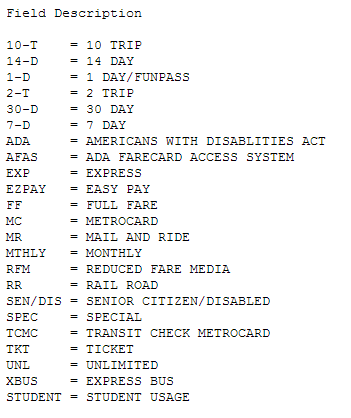

In [250]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

In [251]:
import numpy as np
import json
import pylab as pl
import pandas as pd
import os
import urllib2

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
#replace -1 to nan
mta = mta.astype(float)
mta[mta == -1] = np.nan
# print mta

In [253]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
len(ridetype)

23

In [279]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mta.shape)

sumstation = np.nansum(mta, axis=0)
sumstation = pd.DataFrame(sumstation)

print (mta_allsum.shape)

#or for all ride types
sumridetype = np.nansum(mta, axis=1)
sumridetype = pd.DataFrame(sumridetype)

print (mta_allsum.shape)


(600, 23, 194)
(600, 194)
(600, 194)


In [255]:
date = pd.date_range("05/21/2010","02/21/2014",freq = 'W')
date = date[1:195]
print date

DatetimeIndex(['2010-05-30', '2010-06-06', '2010-06-13', '2010-06-20',
               '2010-06-27', '2010-07-04', '2010-07-11', '2010-07-18',
               '2010-07-25', '2010-08-01',
               ...
               '2013-12-08', '2013-12-15', '2013-12-22', '2013-12-29',
               '2014-01-05', '2014-01-12', '2014-01-19', '2014-01-26',
               '2014-02-02', '2014-02-09'],
              dtype='datetime64[ns]', length=194, freq='W-SUN')


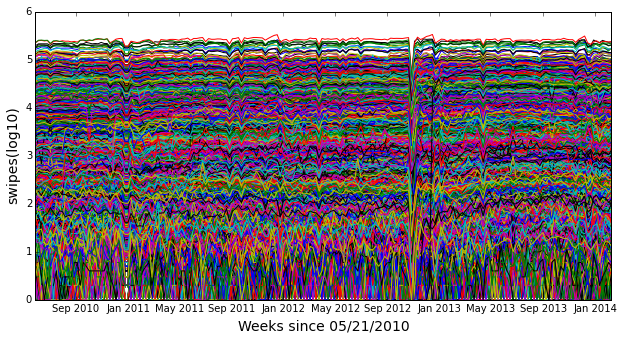

In [256]:
fig = figure(figsize = (10,5))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_xlabel('Weeks since 05/21/2010',fontsize = 14)
ax.set_ylabel('swipes(log10)',fontsize = 14)

for i in range(mta.shape[0]):
    for j in range(mta.shape[1]):
        ax.plot(date, np.log10(mta[i,j]))

### Task 1:
Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.

Identify it and figure out what it is due to.


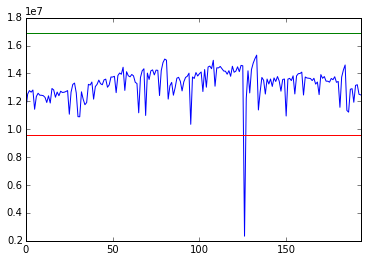

In [276]:
ax = sumstation.loc[0,:].plot()
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]])
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]])


In [280]:
# print (sumstation.loc[0,:].mean,sumstation.loc[0,:].std)
thresholds = [sumstation.loc[0,:].mean() + 3*sumstation.loc[0,:].std(),
              sumstation.loc[0,:].mean() - 3*sumstation.loc[0,:].std()]
print thresholds

[16889312.352366973, 9595433.585777357]


In [281]:
# data = pd.DataFrame(data = sumstation, index = ridetype, columns = time).dropna()
sumstation = pd.DataFrame.transpose(sumstation)
sumstation.columns = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez','ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t','umlim','xbus','stud']

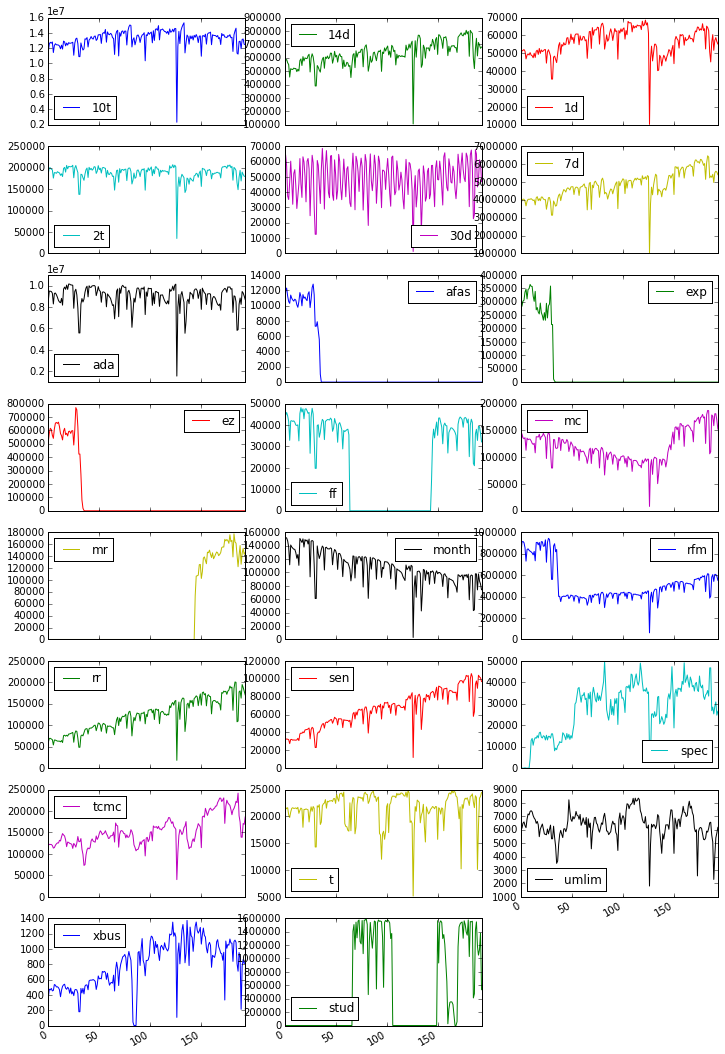

In [282]:
ax = sumstation.plot(subplots = True, figsize = (12,20), layout = (8,3), style = ['', '', '']*8)
plt.legend()


In [286]:
data = pd.DataFrame(sumstation.sum(axis = 1))
data.columns = ['swipes']
data['Date'] = time

In [290]:
data[(data['swipes']<thresholds[1])]

,swipes,Date
126,5218686,2012-10-28


#### The sudden drop in MTA fare in Oct. 28th 2012, should be caused by the Hurricane Sandy

### Task 2: 
Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


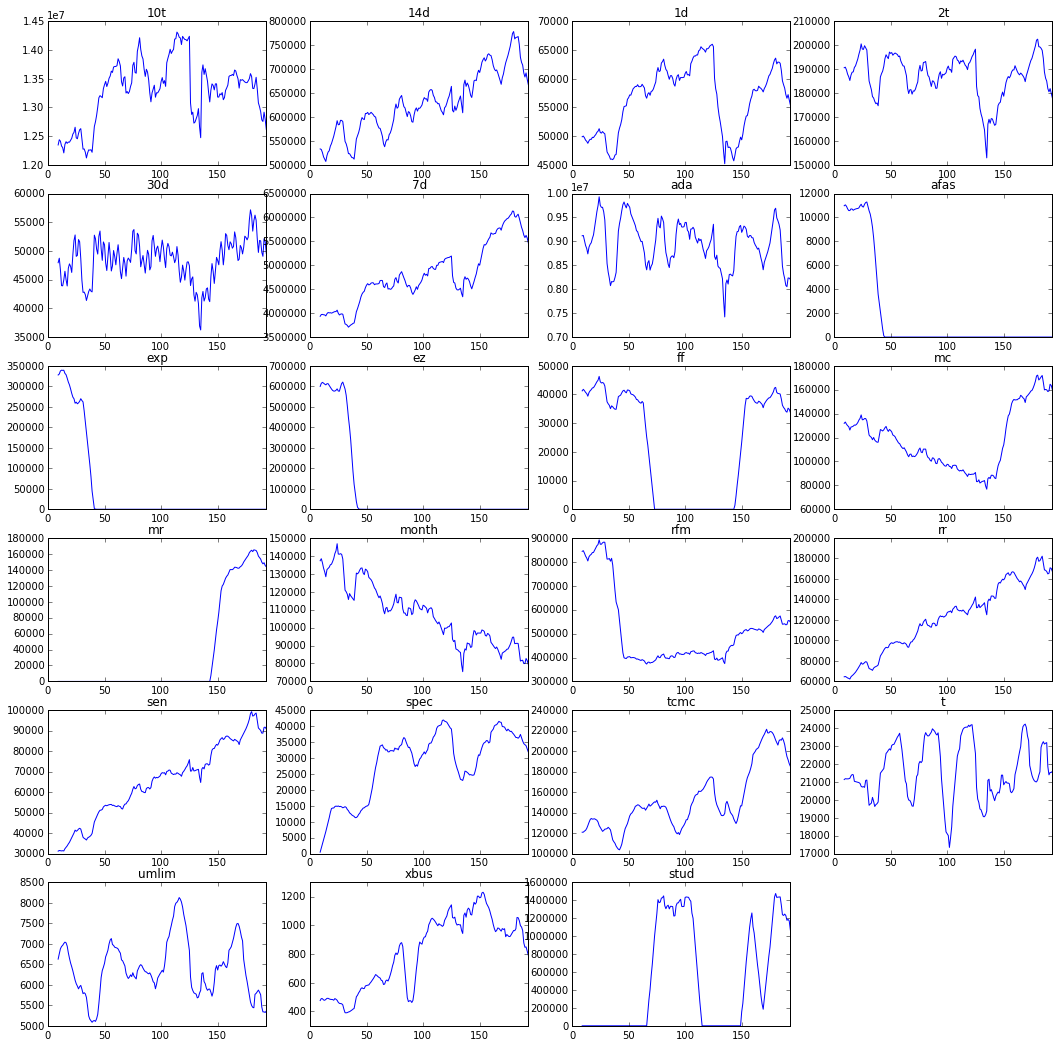

In [317]:
data = np.nansum(mta, axis=0)
data = pd.DataFrame(data)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(18,18))
ratio = np.zeros(23)
std = np.zeros(23)
for i in range(6):
    for j in range(4):
        if i*j<15:
            ax = fig.add_subplot(6,4,i*4+j+1)
            roll_mean = pd.rolling_mean(data.loc[i*4+j,:], 10)
            ax = roll_mean.plot()
            ratio[i*4+j] = roll_mean.loc[9]/roll_mean.loc[193]
            std[i*4+j] = np.nanstd(roll_mean)
            ax.set_title(ridetype[i*4+j])


In [325]:
for i in range(23):
    print 'type:', ridetype[i], '|ratio:', ratio[i], '|std:', std[i]

type: 10t |ratio: 0.978667087302 |std: 546777.616992
type: 14d |ratio: 0.79868054602 |std: 64593.9013999
type: 1d |ratio: 0.899810476622 |std: 5767.41249418
type: 2t |ratio: 1.07088927164 |std: 8828.00385607
type: 30d |ratio: 0.967317176485 |std: 3624.08852559
type: 7d |ratio: 0.719555117345 |std: 631955.017784
type: ada |ratio: 1.11130702032 |std: 473487.373171
type: afas |ratio: 4774.47826087 |std: 3794.92677395
type: exp |ratio: 93571.3428571 |std: 101444.891854
type: ez |ratio: 665798.555556 |std: 206370.776156
type: ff |ratio: 1.22129628533 |std: 18800.9465287
type: mc |ratio: 0.824035088267 |std: 25371.3235538
type: mr |ratio: 4.03470963308e-05 |std: 61154.07344
type: month |ratio: 1.72794422105 |std: 17282.8338522
type: rfm |ratio: 1.53938888675 |std: 153165.983867
type: rr |ratio: 0.385659649203 |std: 33309.1353549
type: sen |ratio: 0.343713862169 |std: 18139.76186
type: spec |ratio: 0.0142485908332 |std: 10350.7975728
type: tcmc |ratio: 0.652626042706 |std: 30841.4542922
type:

#### Increase: "14d" "7d" "ff" "sen"
#### Decrease: "month"

### Task 3:
Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)
